[View in Colaboratory](https://colab.research.google.com/github/hhngan/ML/blob/master/StockAnalyst/Training.ipynb)

# Performace Metrics, Cross Validation, Model Selection, Hyperparameter Optimization, Project Reflection, Tools

In [0]:
#Install libraries

!pip install -q absl-py
!pip install -q astor
!pip install -q botocore
!pip install -q certifi
!pip install -q colorama
!pip install -q cycler
!pip install -q docutils
!pip install -q gast
!pip install -q grpcio
!pip install -q h5py
!pip install -q jmespath
!pip install -q Keras
!pip install -q Keras-Applications
!pip install -q Keras-Preprocessing
!pip install -q kiwisolver
!pip install -q Markdown
!pip install -q matplotlib
!pip install -q mkl-fft
!pip install -q mkl-random
!pip install -q numpy
!pip install -q pandas
!pip install -q protobuf
!pip install -q pyasn1
!pip install -q pyparsing
!pip install -q python-dateutil
!pip install -q pytz
!pip install -q PyYAML
!pip install -q rsa
!pip install -q s3transfer
!pip install -q scikit-learn
!pip install -q scipy
!pip install -q six
!pip install -q tensorboard
!pip install -q tensorflow
!pip install -q termcolor
!pip install -q Werkzeug

!pip show Werkzeug

#Performance Metrics

In [0]:
from matplotlib import cm
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import TimeSeriesSplit

def performance(y_true, y_pred):
    """
    Calculates regression performance
    Args:
        y_true: numpy.ndarray
        y_pred: numpy.ndarray
    Returns:
        mae: mean_absolute_error
        mse: mean_squared_error
        r2: r2
    """
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mae, mse, r2

def plot_performance(results, title, filename):
    """
    Plot the results as subplots for each fold
    Args:
        results: pandas.DataFrame(columns=["fold", "MAE train", "MSE train", 
        "R2 train", "MAE test", "MSE test", "R2 test"])
        filename: str
    Returns:
        None
    """
    fig, axes = plt.subplots(3, 1, figsize=(10, 10))
    fig.tight_layout()
    plt.suptitle(title, fontsize=24)
    plt.subplots_adjust(left=0.1, top=0.9, right=0.9, bottom=0.1, hspace=0.6)
    results[["final_train_idx", "MAE train", "MAE test"]].plot(x="final_train_idx", kind="bar", 
        ax=axes[0], logy=True, colormap=cm.flag)
    axes[0].set_title("MAE")
    axes[0].set_xlabel("Final train index of fold")
    results[["final_train_idx", "MSE train", "MSE test"]].plot(x="final_train_idx", kind="bar", 
        ax=axes[1], logy=True, colormap=cm.flag)
    axes[1].set_title("MSE")
    axes[1].set_xlabel("Final train index of fold")
    results[["final_train_idx", "R2 train", "R2 test"]].plot(x="final_train_idx", kind="bar", 
        ax=axes[2], colormap=cm.flag)
    axes[2].set_title("R2")
    axes[2].set_xlabel("Final train index of fold")
    axes[2].set_ylim(0, 1)
    fig.savefig("{}.png".format(filename))

# LINEAR REGRESSION

In [0]:
# LINEAR REGRESSION
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures

#from training import performance
#from training import plot_performance

def lin_reg_main(X: np.ndarray, y: np.ndarray, tscv_idx) -> None:
    """
    Train linear regression model and save the plot of results to images/
    Args:
        X: features
        y: target variables
        tscv_idx: generator of indexes used for training and testing in folds
    Returns:
        None
    """
    model = linear_model.LinearRegression()
    results = pd.DataFrame(columns=["final_train_idx", "MAE train", "MSE train", 
        "R2 train", "MAE test", "MSE test", "R2 test"])
    for train_idx, test_idx in tscv_idx:
        X_train = X[train_idx,:]
        y_train = y[train_idx,:]
        X_test = X[test_idx,:]
        y_test = y[test_idx,:]
        X_train = PolynomialFeatures(degree=2).fit(X_train).transform(X_train)
        X_test = PolynomialFeatures(degree=2).fit(X_test).transform(X_test)
        model.fit(X_train, y_train)
        # params = model.get_params()
        # coef = model.coef_
        y_pred = model.predict(X_train)
        mae_train, mse_train, r2_train = performance(y_train, y_pred)
        y_pred = model.predict(X_test)
        mae_test, mse_test, r2_test = performance(y_test, y_pred)
        results.loc[len(results)] = [train_idx[-1], mae_train, mse_train, r2_train,
            mae_test, mse_test, r2_test]
    plot_performance(results, "Linear Regression", "lin_reg")

# DECISION TREE

In [0]:
# DECISION TREE

import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures

#from training import performance
#from training import plot_performance

def dtree_main(X: np.ndarray, y: np.ndarray, tscv_idx) -> None:
    """
    Train linear Decision Tree Regressor model and save the plot of results to images/
    Args:
        X: numpy.ndarray
        y: numpy.ndarray
        tscv_idx: generator
    Returns:
        None
    """
    model = tree.DecisionTreeRegressor(splitter="best", max_depth=3,
        min_samples_split=5, max_leaf_nodes=None, random_state=1)
    results = pd.DataFrame(columns=["final_train_idx", "MAE train", "MSE train", 
        "R2 train", "MAE test", "MSE test", "R2 test"])
    for train_idx, test_idx in tscv_idx:
        X_train = X[train_idx,:]
        y_train = y[train_idx,:]
        X_test = X[test_idx,:]
        y_test = y[test_idx,:]
        X_train = PolynomialFeatures(degree=2).fit(X_train).transform(X_train)
        X_test = PolynomialFeatures(degree=2).fit(X_test).transform(X_test)
        model.fit(X_train, y_train)
        # params = model.get_params()
        # coef = model.coef_
        y_pred = model.predict(X_train)
        mae_train, mse_train, r2_train = performance(y_train, y_pred)
        y_pred = model.predict(X_test)
        mae_test, mse_test, r2_test = performance(y_test, y_pred)
        results.loc[len(results)] = [train_idx[-1], mae_train, mse_train, r2_train,
            mae_test, mse_test, r2_test]
    plot_performance(results, "Decision Tree", "tree")

def dtree_grid_search(X: np.ndarray, y: np.ndarray, tscv_idx):
    """
    Train linear Decision Tree Regressor model and save the plot of results to images/
    Args:
        X: numpy.ndarray
        y: numpy.ndarray
        tscv_idx: generator
    Returns:
        None
    """
    X = PolynomialFeatures(degree=2).fit(X).transform(X)
    model = tree.DecisionTreeRegressor(splitter="best", max_depth=10,
        min_samples_split=2, max_leaf_nodes=None, random_state=2)
    splitter = ["best", "random"]
    max_depth = [3, 4, 5, 6]
    min_samples_split = [5, 7, 10, 12, 15]
    max_leaf_nodes = [None, 50, 100, 200]
    param_grid = dict(splitter=splitter, max_depth=max_depth, 
        min_samples_split=min_samples_split, max_leaf_nodes=max_leaf_nodes)
    grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=tscv_idx)
    grid_result = grid.fit(X, y)
    means = grid_result.cv_results_["mean_test_score"]
    params = grid_result.cv_results_["params"]
    results = pd.DataFrame(columns=["splitter", "max_depth", 
        "min_samples_split", "max_leaf_nodes", "mse"])
    for mean, param in zip(means, params):
        row = [param["splitter"], param["max_depth"], 
            param["min_samples_split"], param["max_leaf_nodes"], mean]
        results.loc[len(results)] = row
        print(row)
    print(results)
    print("Best score: {} using {}".format(grid_result.best_score_, grid_result.best_params_))

# NEURAL NETWORK WITH SCIKIT

In [0]:
# NEURAL NETWORK WITH SCIKIT

import numpy as np
import pandas as pd
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import PolynomialFeatures

#from training import performance
#from training import plot_performance

def nn_scikit_main(X: np.ndarray, y: np.ndarray, tscv_idx) -> None:
    """
    Train linear Decision Tree Regressor model and save the plot of results to images/
    Args:
        X: numpy.ndarray
        y: numpy.ndarray
        tscv_idx: generator of indexes used for training and testing in folds
    Returns:
        None
    """
    X = PolynomialFeatures(degree=2).fit(X).transform(X)
    model = MLPRegressor(hidden_layer_sizes=(200, 200), solver="adam", 
        activation="relu", random_state=2)
    results = pd.DataFrame(columns=["final_train_idx", "MAE train", "MSE train", 
        "R2 train", "MAE test", "MSE test", "R2 test"])
    for train_idx, test_idx in tscv_idx:
        X_train = X[train_idx,:]
        y_train = y[train_idx,:]
        X_test = X[test_idx,:]
        y_test = y[test_idx,:]
        model.fit(X_train, y_train)
        # params = model.get_params()
        # coef = model.coef_
        y_pred = model.predict(X_train)
        mae_train, mse_train, r2_train = performance(y_train, y_pred)
        y_pred = model.predict(X_test)
        mae_test, mse_test, r2_test = performance(y_test, y_pred)
        results.loc[len(results)] = [train_idx[-1], mae_train, mse_train, r2_train,
            mae_test, mse_test, r2_test]
    plot_performance(results, "Neural Net scikit-learn", "neural_net_scikit")

# NEURAL NETWORK WITH KERAS

In [0]:
# NEURAL NETWORK WITH KERAS

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from matplotlib import cm
from numpy.random import seed
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from tensorflow import set_random_seed

#from training import performance
#from training import plot_performance

seed(1)
set_random_seed(2)

def nn_keras_main(X: np.ndarray, y: np.ndarray, tscv_idx) -> None:
    """
    Train linear Decision Tree Regressor model and save the plot of results to images/
    Args:
        X: numpy.ndarray
        y: numpy.ndarray
        tscv_idx: generator of indexes used for training and testing in folds
    Returns:
        None
    """
    X = PolynomialFeatures(degree=2).fit(X).transform(X)
    model = build_model(input_size=len(X[0]), optimizer="RMSprop", activation="softmax", neurons=200)
    results = pd.DataFrame(columns=["final_train_idx", "MAE train", "MSE train", 
        "R2 train", "MAE test", "MSE test", "R2 test"])
    for train_idx, test_idx in tscv_idx:
        X_train = X[train_idx,:]
        y_train = y[train_idx,:]
        X_test = X[test_idx,:]
        y_test = y[test_idx,:]
        model.fit(X_train, y_train, epochs=10, batch_size=20, verbose=1)
        # params = model.get_params()
        # coef = model.coef_
        y_pred = model.predict(X_train)
        mae_train, mse_train, r2_train = performance(y_train, y_pred)
        y_pred = model.predict(X_test)
        mae_test, mse_test, r2_test = performance(y_test, y_pred)
        results.loc[len(results)] = [train_idx[-1], mae_train, mse_train, r2_train,
            mae_test, mse_test, r2_test]
    plot_performance(results, "Neural Net Keras", "neural_keras")

def nn_keras_grid_search(X: np.ndarray, y: np.ndarray, tscv_idx):
    """
    Train linear Decision Tree Regressor model and save the plot of results to images/
    Args:
        X: numpy.ndarray
        y: numpy.ndarray
        tscv_idx: generator
    Returns:
        None
    """
    X = PolynomialFeatures(degree=2).fit(X).transform(X)
    model = KerasRegressor(build_fn=build_model, verbose=0)
    batch_size = [10, 20]
    epochs = [10, 15]
    optimizer = ["RMSprop", "Adam"]
    activation = ["softmax", "relu", "tanh"]
    neurons = [10, 50, 200]
    param_grid = dict(batch_size=batch_size, epochs=epochs, optimizer=optimizer,
        activation=activation, neurons=neurons)
    grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=tscv_idx)
    grid_result = grid.fit(X, y, verbose=1)
    means = grid_result.cv_results_["mean_test_score"]
    params = grid_result.cv_results_["params"]
    results = pd.DataFrame(columns=["batch_size", "epochs", "optimizer", 
        "activation", "neurons", "mse"])
    for mean, param in zip(means, params):
        results.loc[len(results)] = [param["batch_size"], param["epochs"], 
            param["optimizer"], param["activation"], param["neurons"], mean]
    print(results)
    print("Best score: {} using {}".format(grid_result.best_score_, grid_result.best_params_))
    
def build_model(input_size=171, optimizer="adam", activation="relu", neurons=200):
    """
    Train linear Decision Tree Regressor model and save the plot of results to images/
    Args:
        input_size: number of neurons in the first layer
        optimizer: model compilation optimizer
        activation: layer activation function
        neurons: number of neurons in each layer
    Returns:
        Sequential model
    """
    model = Sequential()
    model.add(Dense(neurons, activation=activation, input_dim=input_size))
    model.add(Dense(neurons, activation=activation))
    model.add(Dense(1, activation="linear"))
    model.compile(optimizer=optimizer, loss="mse")
    return model

#MAIN TRAINING

['best', 3, 5, None, -0.0030510149414273435]
['random', 3, 5, None, -1.379639850095745]
['best', 3, 7, None, -0.0030510149414273435]
['random', 3, 7, None, -1.3445349971161835]
['best', 3, 10, None, -0.03670427775039024]
['random', 3, 10, None, -1.3445349971161835]
['best', 3, 12, None, -0.03670427775039024]
['random', 3, 12, None, -1.3445349971161835]
['best', 3, 15, None, -0.03670427775039024]
['random', 3, 15, None, -1.3445349971161835]
['best', 3, 5, 50, -0.0259577299722135]
['random', 3, 5, 50, -2.334300641499149]
['best', 3, 7, 50, -0.0259577299722135]
['random', 3, 7, 50, -1.3467235695840902]
['best', 3, 10, 50, -0.05961032091456961]
['random', 3, 10, 50, -1.3459223748073263]
['best', 3, 12, 50, -0.05961032091456961]
['random', 3, 12, 50, -1.3459223748073263]
['best', 3, 15, 50, -0.05961032091456961]
['random', 3, 15, 50, -1.3459223748073263]
['best', 3, 5, 100, -0.0259577299722135]
['random', 3, 5, 100, -2.334300641499149]
['best', 3, 7, 100, -0.0259577299722135]
['random', 3, 

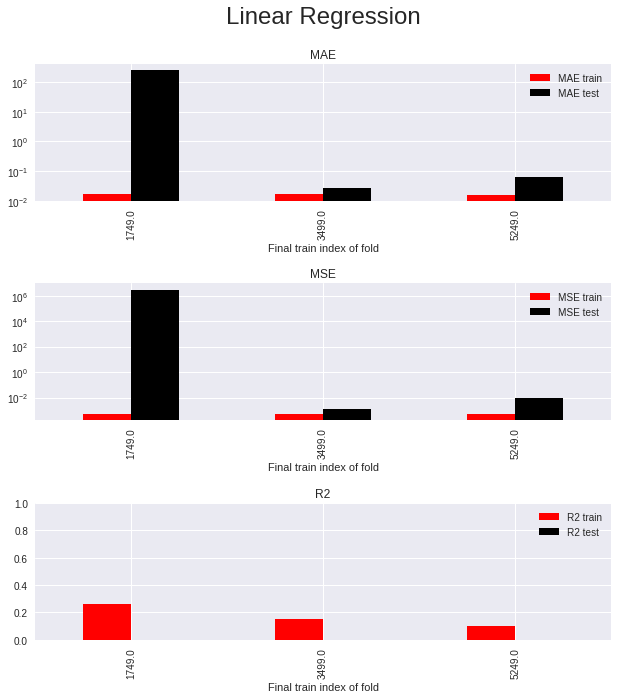

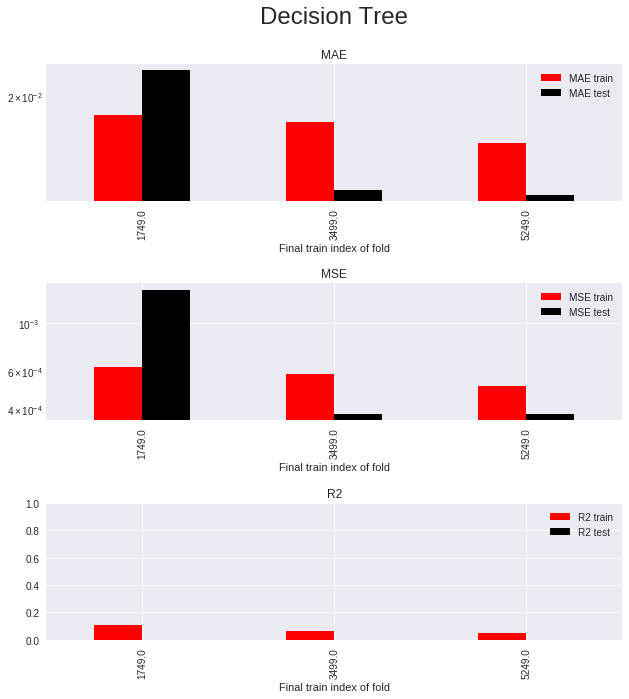

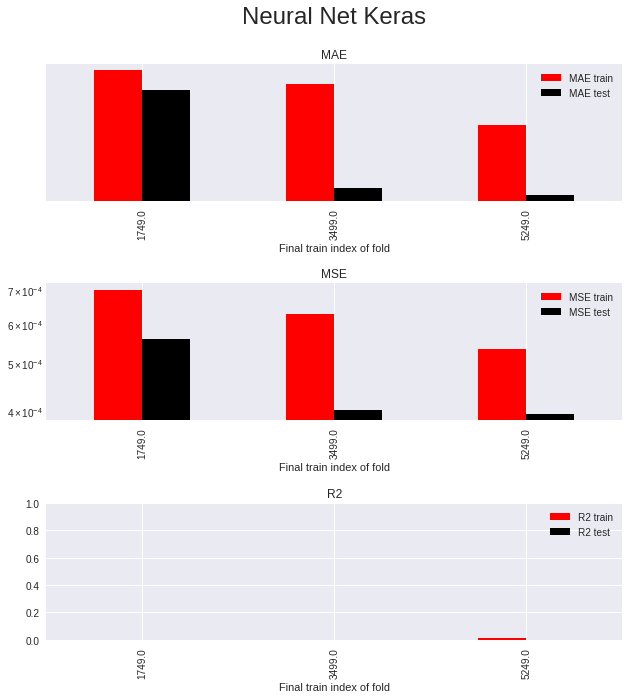

In [17]:
#MAIN TRAINING
import warnings
# Ignore warning: lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88 return f(*args, **kwds)
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd



FILE_NAME_PATH = "https://github.com/hhngan/ML/raw/master/StockAnalyst/MSFT.csv"
FILE_NAME_FEATURES_PATH = "https://github.com/hhngan/ML/raw/master/StockAnalyst/MSFT_X_learn.csv"
FILE_NAME_VARIABLE_PATH = "https://github.com/hhngan/ML/raw/master/StockAnalyst/MSFT_y_learn.csv"

def training():
    filename = FILE_NAME_PATH
    X, y = training_data_from_csv(filename_features=FILE_NAME_FEATURES_PATH, 
        filename_variables=FILE_NAME_VARIABLE_PATH)
    X = X.values # convert to numpy.ndarray used by sklearn
    y = y.values # convert to numpy.ndarray used by sklearn
    tscv = TimeSeriesSplit(n_splits=3)
    
    #import linear_regression as lin_reg
    lin_reg_main(X, y, tscv.split(X))
    
    #import decision_tree as dtree
    dtree_main(X, y, tscv.split(X))
    dtree_grid_search(X, y, tscv.split(X))
    
    #import neural_net_scikit as nn_scikit
    # nn_scikit.main(X, y, tscv.split(X))
    
    #import neural_net_keras as nn_keras
    nn_keras_main(X, y, tscv.split(X))
    # nn_keras.grid_search(X, y, tscv.split(X))

def training_data_from_csv(filename_features, filename_variables):
    """
    Load cvs file of features and target variables from csv
    Args:
        filename_features: string
        filename_variables: string
    Returns:
        pandas.DataFrame
    """
    X = pd.read_csv(filename_features, header=0)
    y = pd.read_csv(filename_variables, header=0)
    return X, y    


if __name__ == "__main__":
    training()